## Importing and downloading necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
import string
import re
import nltk
nltk.download('stopwords',quiet=True)

from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Import and read dataset

In [2]:
df = pd.read_csv('spamsms-1.csv',encoding='latin-1')
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Rename columns

In [3]:
df.rename(columns = {'type':'labels', 'text':'message'}, inplace=True)
df.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Check shape of the dataset and remove any duplicates (if any)

In [4]:
df.shape

(5572, 2)

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(5169, 2)

## Perform label encoding to the target variable 0 or 1

In [6]:
Le = LabelEncoder()
df['labels']=Le.fit_transform(df['labels'])
df.head()

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
print('0 means.... {}'.format(Le.inverse_transform([0])))
print('1 means.... {}'.format(Le.inverse_transform([1])))

0 means.... ['ham']
1 means.... ['spam']


## Create a UDF to preprocess the text data
* Remove all punctuation
* Remove all stopwords
* Returns a list of the cleaned text

In [8]:
def preprocess_text(message):
    
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    
    """
    # Check characters to see if they are in punctuation
    without_punc = [char for char in message if char not in string.punctuation]

    # Join the characters again to form the string.
    without_punc = ''.join(without_punc)
    
    # Now just remove any stopwords
    return [word for word in without_punc.split() if word.lower() not in stopwords.words('english')]

In [9]:
df['message'].head().apply(preprocess_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Plot WordCloud for spam text messages

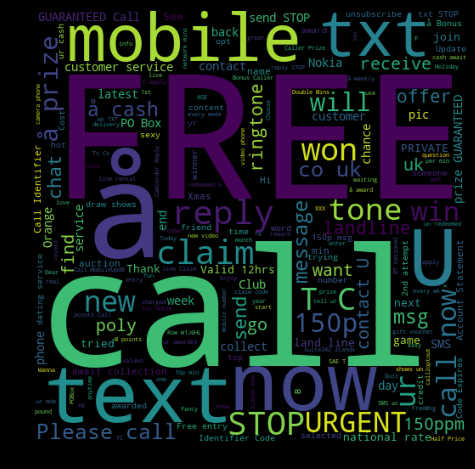

In [10]:
spam_words = ' '.join(list(df[df['labels'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.show()

## Plot WordCloud for genuine text messages

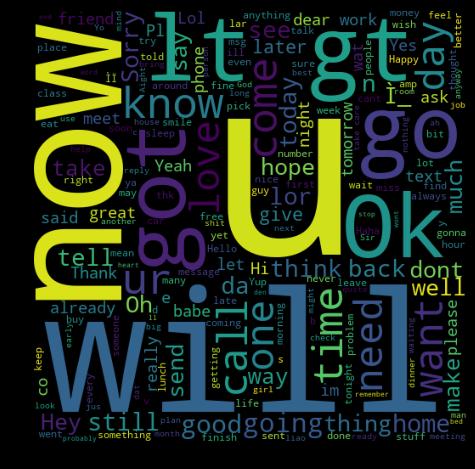

In [11]:
ham_words = ' '.join(list(df[df['labels'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.show()

## Build a Multinomial Naïve Bayes classifier model
* Separate X and y variables
* Perform train-test split
* Use classifier.fit()
* Predict the results for both Train and Test data
* Plot confusion Matrix
* Analyse the results

In [12]:
X = df['message']
y = df['labels']

cv = CountVectorizer()
X =  cv.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [14]:
classifier = MultinomialNB().fit(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       0.98      0.97      0.97       504

    accuracy                           0.99      4135
   macro avg       0.99      0.98      0.99      4135
weighted avg       0.99      0.99      0.99      4135

--------------------------------------------------
Accuracy :  0.9939540507859734
--------------------------------------------------
Confusion Matrix:



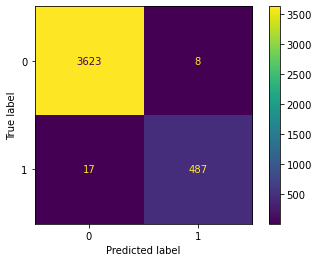

In [15]:
pred_train = classifier.predict(X_train)
print(classification_report(y_train, pred_train))
print('-'*50)
print('Accuracy : ',accuracy_score(y_train, pred_train))
print('-'*50)
print('Confusion Matrix:\n')
cm = confusion_matrix(y_train, pred_train, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       885
           1       0.91      0.93      0.92       149

    accuracy                           0.98      1034
   macro avg       0.95      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034

--------------------------------------------------
Accuracy :  0.9777562862669246
--------------------------------------------------
Confusion Matrix:



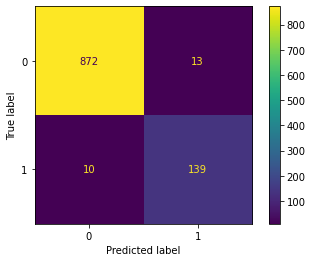

In [16]:
pred_test = classifier.predict(X_test)
print(classification_report(y_test, pred_test))
print('-'*50)
print('Accuracy : ',accuracy_score(y_test, pred_test))
print('-'*50)
print('Confusion Matrix:\n')
cm = confusion_matrix(y_test, pred_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [17]:
# print the predictions
print(classifier.predict(X_test))

# print the actual values
print(y_test.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


## Create a UDF to predict a sms as 'spam' or 'ham'

In [18]:
def sms(text):
    
    # creating a list of labels
    lab = ['not a spam','a spam'] 
    
    # perform tokenization
    x = cv.transform(text).toarray()
    
    # predict the text
    p = classifier.predict(x)
    
    # convert the words in string with the help of list
    s = [str(i) for i in p]
    a = int("".join(s))
    
    # show out the final result
    res = str("This message is "+ lab[a])
    print(res)

In [19]:
# sample usage
sms(['Hurray! you have won $3000. Get your money using this link.'])

This message is a spam


## Use Python Tkinter library to create a GUI-based application

In [20]:
from tkinter import *
import tkinter as tk

gui = Tk()
gui.configure(background= 'light yellow')
gui.title('Spam Detection - Baacumen')
gui.geometry('450x300')

head = Label(gui,text = 'Type Your Message', font=('times',14,'bold'),bg='light yellow')
head.pack()

message = Entry(gui,width=400,borderwidth = 2)
message.pack()
result = Label(gui)
def sms():
    global result
    result.destroy()
    global message
    text = message.get()
    # creating a list of labels
    lab = ['not a spam','a spam'] 
    
    # perform tokenization
    x = cv.transform([text]).toarray()
    
    # predict the text
    p = classifier.predict(x)
    
    # convert the words in string with the help of list
    s = [str(i) for i in p]
    a = int("".join(s))
    
    # show out the final result
    res = str("This message is "+ lab[a])
    #print(text,res)
    result = Label(gui,text=res,font=('times',18,'bold'),fg = 'blue',bg='light yellow')
    result.pack()
    
b = Button(gui,text='Click To Check',font=('times',12,'bold'), fg = 'white',bg ='green',command = sms)
b.pack()

gui.mainloop()